Mengunduh file dari Google Drive ID: 1dAI9aye3wfe57e743HOoIGVMwESkFAXQ


Downloading...
From (original): https://drive.google.com/uc?id=1dAI9aye3wfe57e743HOoIGVMwESkFAXQ
From (redirected): https://drive.google.com/uc?id=1dAI9aye3wfe57e743HOoIGVMwESkFAXQ&confirm=t&uuid=b9fdbcb2-a18f-4c55-810b-044715da8419
To: /content/best_model.keras
100%|██████████| 67.9M/67.9M [00:01<00:00, 64.6MB/s]


Selesai mengunduh: /content/best_model.keras
Model berhasil dimuat.

Mengunduh file dari Google Drive ID: 1wXqnCzQEj2eRbVYoBEfw80nvgHSeaflV


Downloading...
From: https://drive.google.com/uc?id=1wXqnCzQEj2eRbVYoBEfw80nvgHSeaflV
To: /content/images.zip
100%|██████████| 2.01M/2.01M [00:00<00:00, 170MB/s]


Selesai mengunduh: /content/images.zip
📦 Mengekstrak ZIP...
Ekstraksi selesai.

Memulai prediksi pada semua gambar...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


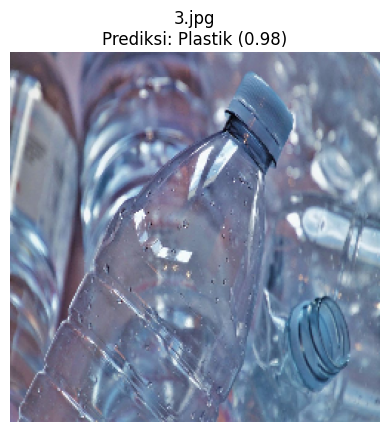

3.jpg: Plastik | Probabilitas: 0.98

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step


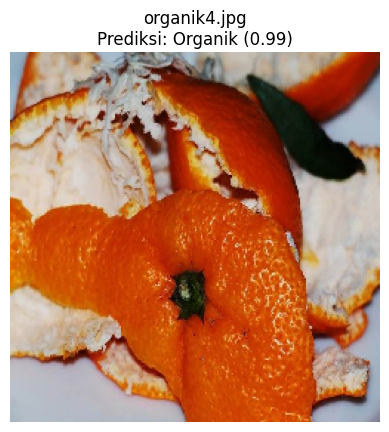

organik4.jpg: Organik | Probabilitas: 0.99

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


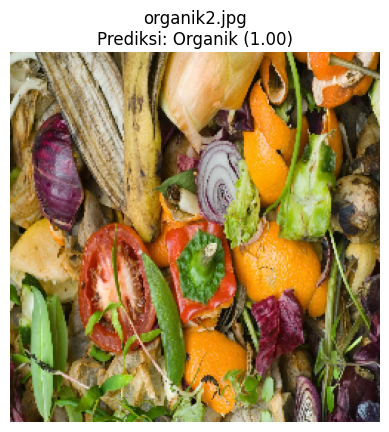

organik2.jpg: Organik | Probabilitas: 1.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step


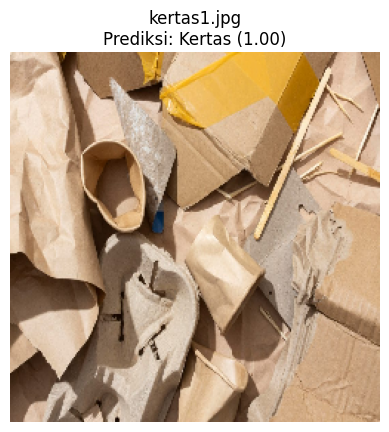

kertas1.jpg: Kertas | Probabilitas: 1.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


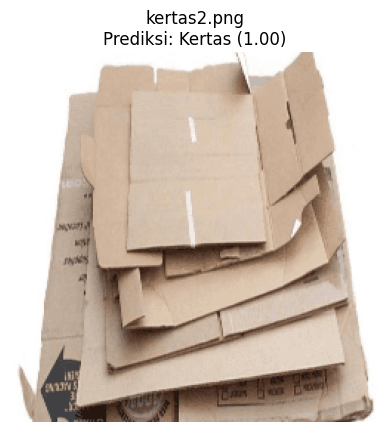

kertas2.png: Kertas | Probabilitas: 1.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step


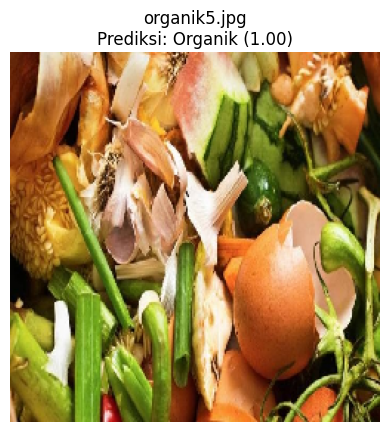

organik5.jpg: Organik | Probabilitas: 1.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


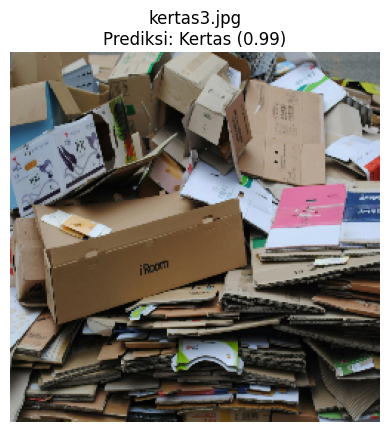

kertas3.jpg: Kertas | Probabilitas: 0.99

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step


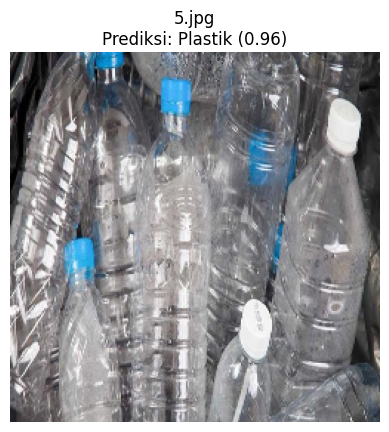

5.jpg: Plastik | Probabilitas: 0.96

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step


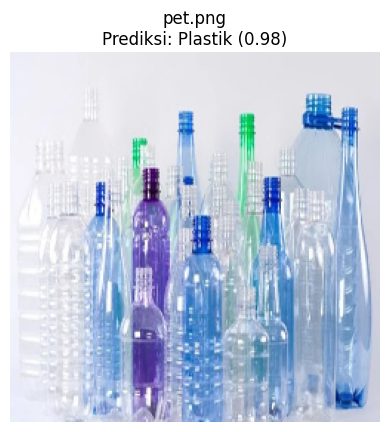

pet.png: Plastik | Probabilitas: 0.98



In [ ]:
import os
import gdown
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# --- SETUP --- #
drive_file_id_model = "1dAI9aye3wfe57e743HOoIGVMwESkFAXQ"
drive_file_id_zip = "1wXqnCzQEj2eRbVYoBEfw80nvgHSeaflV"
local_model_path = "/content/best_model.keras"
zip_path = "/content/images.zip"
extract_dir = "/content/images"

target_size = (250, 250)
class_names = ['Kertas', 'Organik', 'Plastik']
# ---------------- #

# --- Fungsi Unduh --- #
def download_file_from_gdrive(file_id, output_path):
    try:
        print(f"Mengunduh file dari Google Drive ID: {file_id}")
        gdown.download(id=file_id, output=output_path, quiet=False)
        print(f"Selesai mengunduh: {output_path}")
    except Exception as e:
        print(f"Gagal mengunduh: {e}")

# --- Unduh dan Load Model --- #
download_file_from_gdrive(drive_file_id_model, local_model_path)
model = load_model(local_model_path)
print("Model berhasil dimuat.\n")

# --- Unduh dan Ekstrak ZIP --- #
download_file_from_gdrive(drive_file_id_zip, zip_path)

print("📦 Mengekstrak ZIP...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print("Ekstraksi selesai.\n")

# --- Prediksi Semua Gambar --- #
import os

# --- Prediksi Semua Gambar (dalam subfolder juga) --- #
print("Memulai prediksi pada semua gambar...")

for root, dirs, files in os.walk(extract_dir):  # Telusuri semua folder
    for fname in files:
        if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(root, fname)
            try:
                img = load_img(img_path, target_size=target_size)
                img_array = img_to_array(img) / 255.0
                img_array = np.expand_dims(img_array, axis=0)

                prediction = model.predict(img_array)
                pred_label_index = np.argmax(prediction)
                pred_label = class_names[pred_label_index]
                confidence = np.max(prediction)

                # Tampilkan gambar dan prediksi
                plt.imshow(img)
                plt.axis('off')
                plt.title(f"{fname}\nPrediksi: {pred_label} ({confidence:.2f})")
                plt.show()

                print(f"{fname}: {pred_label} | Probabilitas: {confidence:.2f}\n")
            except Exception as e:
                print(f"Gagal memproses {fname}: {e}")
